In [19]:
import anndata as an
import scanpy as sc

In [20]:
hips = an.read_h5ad("dataset/hiPSC.h5ad")

c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\compat\__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [21]:
hips.T

AnnData object with n_obs × n_vars = 23543 × 4694
    obs: 'features'
    var: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22'
    uns: 'neighbors'
    varm: 'X_mnn', 'X_umap'
    varp: 'distances'

In [22]:
tysr = an.read_h5ad("dataset/tyser.h5ad")


In [23]:
tysr.T

AnnData object with n_obs × n_vars = 57490 × 1069
    obs: 'features'
    var: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt'

In [24]:
raw_merge = sc.AnnData.concatenate(hips,tysr)

inner_merge = an.concat([hips,tysr],join="inner", label="dataset", keys=["reference", "query"])

C:\Users\Mick\AppData\Local\Temp\ipykernel_18484\106952039.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  raw_merge = sc.AnnData.concatenate(hips,tysr)


KeyboardInterrupt: 

In [ ]:
sc.pp.neighbors(raw_merge)
sc.pp.neighbors(inner_merge)

c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\scanpy\tools\_utils.py:41: UserWarning: You’re trying to run this on 21482 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\scanpy\tools\_utils.py:41: UserWarning: You’re trying to run this on 21482 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [ ]:
sc.tl.umap(raw_merge)
sc.tl.umap(inner_merge)

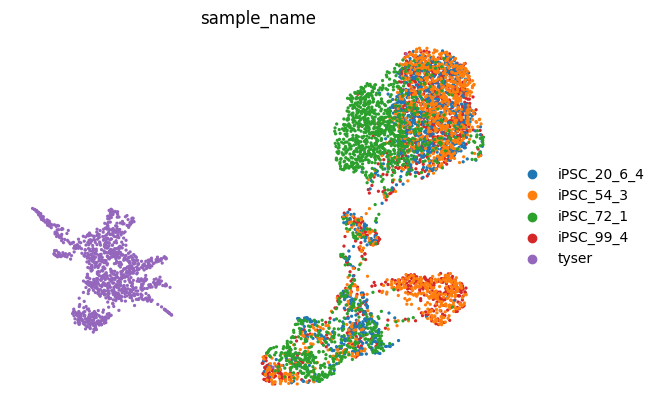

In [ ]:
sc.pl.umap(raw_merge, color='sample_name', 
           legend_fontsize='medium', size=22, frameon=False)

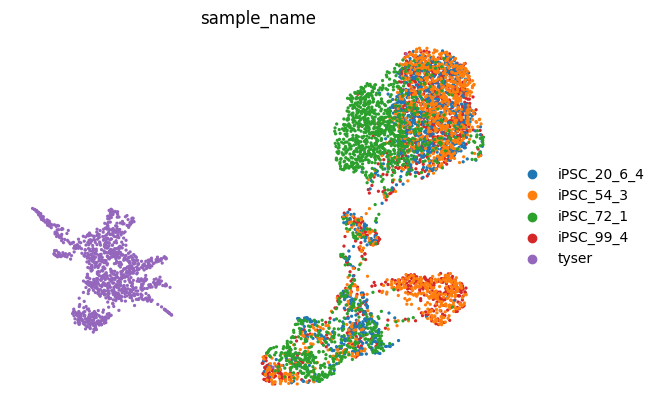

In [ ]:
sc.pl.umap(inner_merge, color='sample_name', 
           legend_fontsize='medium', size=22, frameon=False)

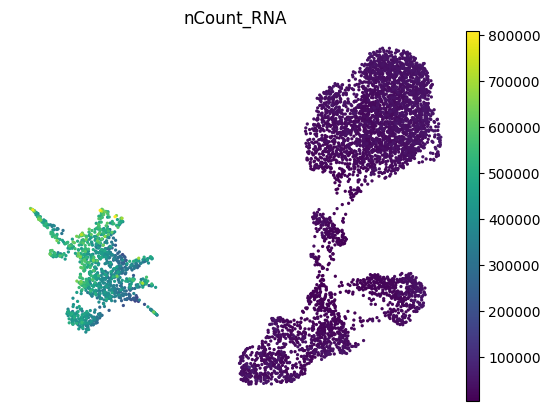

In [ ]:

sc.pl.umap(inner_merge, color='nCount_RNA', 
           legend_fontsize='medium', size=22, frameon=False)


In [ ]:
hips.var

PairwiseArrays with keys: 